In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("http://51.91.120.89/extras/otodom.csv")
df

,id,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
0,46lCR,979000,5,4,5,83.00,2009
1,44Utr,1400000,7,3,2,82.94,2011
2,3Bdli,640659,4,3,2,64.13,2019
3,46q1p,410000,12,2,4,36.30,1975
4,468dI,415900,10,2,6,31.06,1974
...,...,...,...,...,...,...,...
4309,33tFV,2500000,2,6,2,210.00,2015
4310,2UNVb,1860000,8,3,7,98.00,2012
4311,2JILp,995000,13,5,8,138.00,1997
4312,2zmYc,2550000,3,3,1,118.50,2009


In [3]:
df.describe()

,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
count,4.314000e+03,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000
mean,8.616312e+05,7.210246,2.807371,3.400093,70.346140,2010.707464
std,6.459324e+05,4.065722,1.069238,2.657749,40.817224,272.651375
min,1.873300e+05,1.000000,1.000000,0.000000,14.410000,1970.000000
25%,5.250000e+05,4.000000,2.000000,1.000000,45.200000,2000.000000
50%,6.674315e+05,7.000000,3.000000,3.000000,60.000000,2012.000000
75%,9.399000e+05,10.000000,3.000000,5.000000,81.000000,2020.000000
max,1.000000e+07,30.000000,9.000000,10.000000,506.000000,19885.000000


<AxesSubplot:xlabel='cena', ylabel='Count'>

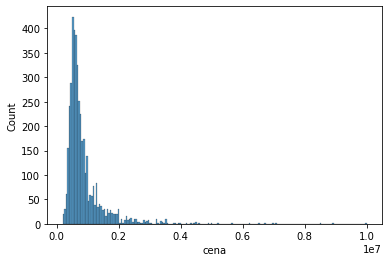

In [4]:
sns.histplot(df.cena)

In [5]:
df.corr()

,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
cena,1.000000,-0.188122,0.608984,-0.026369,0.854614,-0.001137
liczba_pieter,-0.188122,1.000000,-0.220447,0.497311,-0.232934,0.008719
liczba_pokoi,0.608984,-0.220447,1.000000,-0.053239,0.793551,-0.001417
pietro,-0.026369,0.497311,-0.053239,1.000000,-0.059320,0.019680
powierzchnia,0.854614,-0.232934,0.793551,-0.059320,1.000000,-0.003730
rok_budowy,-0.001137,0.008719,-0.001417,0.019680,-0.003730,1.000000


<AxesSubplot:>

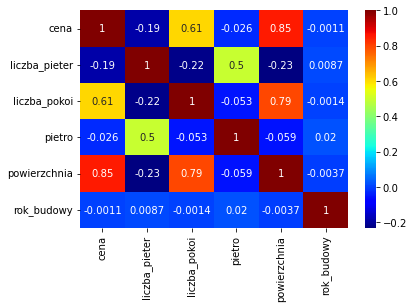

In [7]:
sns.heatmap( df.corr(), annot=True, cmap="jet" )

<AxesSubplot:>

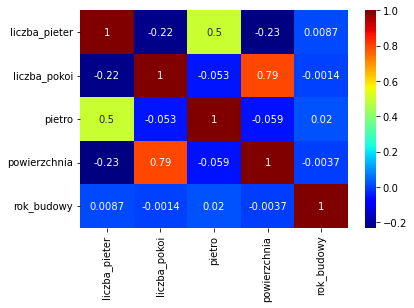

In [11]:
sns.heatmap( df.iloc[: , 2:].corr() , annot=True, cmap="jet")

In [13]:
#df.describe()
min_ = df.describe().loc["min","cena"]
q3_ = df.describe().loc["75%","cena"]
min_, q3_

(187330.0, 939900.0)

In [14]:
df1 = df.query(f" cena>={min_} and cena<={q3_} ")
df1.shape

(3236, 7)

<AxesSubplot:xlabel='cena', ylabel='Count'>

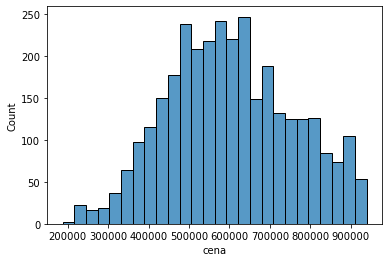

In [15]:
sns.histplot(df1.cena)

C:\Users\kurs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


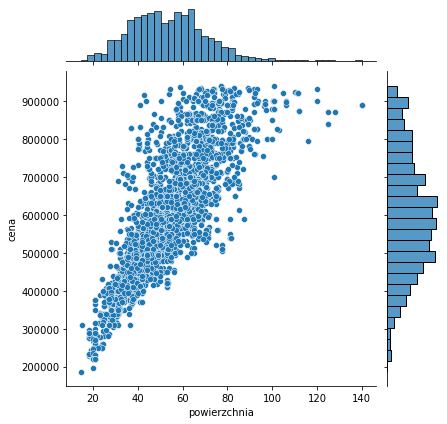

In [17]:
sns.jointplot(df1.powierzchnia, df1.cena)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [22]:
X = df1.iloc[: , 2:]
y = df1.cena
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape

((2588, 5), (648, 5))

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_train)
r2_score(y_train, y_pred)

0.6626635466445601

In [26]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.6738871746608246

In [27]:
model.score(X_train, y_train)

0.6626635466445601

In [28]:
model.score(X_test, y_test)

0.6738871746608246

In [32]:
# estymator na wszystkich danych
X = df.iloc[: , 2:]
y = df.cena
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape

((3451, 5), (863, 5))

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-8.788806531227678